In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind, pearsonr, spearmanr
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv('Cleaned_Life_Expectancy_Data.csv')
print(df.describe())

              Year  Adult_mortality  Alcohol_consumption          BMI  \
count  2864.000000      2864.000000          2864.000000  2864.000000   
mean   2007.500000       192.251775             4.820882    25.032926   
std       4.610577       114.910281             3.981949     2.193905   
min    2000.000000        49.384000             0.000000    19.800000   
25%    2003.750000       106.910250             1.200000    23.200000   
50%    2007.500000       163.841500             4.020000    25.500000   
75%    2011.250000       246.791375             7.777500    26.400000   
max    2015.000000       719.360500            17.870000    32.100000   

       Incidents_HIV  Population_mln    Schooling  Life_expectancy  \
count    2864.000000     2864.000000  2864.000000      2864.000000   
mean        0.894288       36.675915     7.632123        68.856075   
std         2.381389      136.485867     3.171556         9.405608   
min         0.010000        0.080000     1.100000        39.40

In [4]:
# Define target and features
X = df.drop(['Life_expectancy', 'Country', 'Region'], axis=1)
y = df['Life_expectancy']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Linear Regression
lr = LinearRegression()
lr.fit(X, y)
print("Linear Regression Coefficients:", lr.coef_)

Linear Regression Coefficients: [ 2.83845102e-02 -4.66578752e-02  4.81882948e-02 -2.17595322e-01
  5.08615008e-02 -1.96095066e-04  9.38235945e-02 -4.34308566e-03
 -1.82476996e-02  5.17368499e-01 -3.74269584e-02 -5.16617927e-02
 -8.32494345e-01]


In [6]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
print("Lasso Regression Coefficients:", lasso.coef_)

Lasso Regression Coefficients: [ 1.71686124e-02 -4.82733378e-02  8.11798004e-02 -1.65446351e-01
  4.43514339e-02 -1.78236175e-04  9.46304855e-02 -3.86111382e-03
  1.00698842e-02  4.40849061e-01 -2.91379531e-02 -4.97636975e-02
 -0.00000000e+00]


In [7]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)
importances = rf.feature_importances_
features = X.columns
print("Random Forest Feature Importances:")
for i, v in enumerate(importances):
    print(f"{features[i]}: {v:.4f}")

Random Forest Feature Importances:
Year: 0.0015
Adult_mortality: 0.2323
Alcohol_consumption: 0.0022
BMI: 0.0021
Incidents_HIV: 0.0021
Population_mln: 0.0024
Schooling: 0.0018
Avg_Immunization: 0.0010
Adult_to_Infant_Mortality_Ratio: 0.0010
GDP_per_capita_log: 0.0022
Thinness_children_adolescents: 0.0018
Child_deaths: 0.7495
Economic_Status_Developing: 0.0001


In [9]:
# Prepare data
X_cls = df.drop(['Economic_Status_Developing', 'Country', 'Region'], axis=1)
y_cls = df['Economic_Status_Developing']

# Split data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_cls, y_train_cls)

# Get the feature importances
importances = rf.feature_importances_

# Get the feature names
feature_names = X_train_cls.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame in descending order of importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

                            Feature  Importance
12                     Child_deaths    0.205291
7                   Life_expectancy    0.153433
9   Adult_to_Infant_Mortality_Ratio    0.130187
2               Alcohol_consumption    0.127075
10               GDP_per_capita_log    0.112339
11    Thinness_children_adolescents    0.079559
6                         Schooling    0.061612
4                     Incidents_HIV    0.042160
1                   Adult_mortality    0.039571
5                    Population_mln    0.018331
3                               BMI    0.014646
8                  Avg_Immunization    0.011833
0                              Year    0.003962


In [10]:
# Correlation
correlation, _ = pearsonr(df['Child_deaths'], df['Life_expectancy'])
print(f"Pearson Correlation between Child Deaths and Life Expectancy: {correlation:.4f}")

Pearson Correlation between Child Deaths and Life Expectancy: -0.9234


In [11]:
# Correlation
correlation, _ = pearsonr(df['Economic_Status_Developing'], df['Life_expectancy'])
print(f"Pearson Correlation between Status and Life Expectancy: {correlation:.4f}")

Pearson Correlation between Status and Life Expectancy: -0.5238


In [12]:
# t-test
developed = df[df['Economic_Status_Developing'] == 1]['Life_expectancy']
developing = df[df['Economic_Status_Developing'] == 0]['Life_expectancy']
t_stat, p_value = ttest_ind(developed, developing)
print(f"t-test: t={t_stat:.4f}, p={p_value:.4f}")

t-test: t=-32.8951, p=0.0000


In [13]:
# Forecast with ARIMA Model (Viable since p=0)

def forecast_life_expectancy(df, start_year=2016, end_year=2040):
    # Unique countries
    countries = df['Country'].unique()
    forecast_years = list(range(start_year, end_year + 1))
    forecasts = {}

    for country in countries:
        country_data = df[df['Country'] == country].groupby('Year')['Life_expectancy'].mean()
        
        # Fit ARIMA model
        try:
            arima_model = ARIMA(country_data, order=(3, 1, 0))
            arima_results = arima_model.fit()
            forecast = arima_results.get_forecast(steps=len(forecast_years))
            forecast_values = forecast.predicted_mean

            # Store both historical and forecast data
            forecasts[country] = {
                "historical": country_data,
                "forecast": pd.DataFrame({
                    'Year': forecast_years,
                    'Forecasted Life Expectancy': forecast_values
                })
            }
        except Exception as e:
            print(f"Failed for {country}: {e}")

    return forecasts

In [14]:
def plot_country_forecast(forecasts, country_name):
    if country_name not in forecasts:
        print(f"No forecast available for {country_name}.")
        return
    
    data = forecasts[country_name]
    historical = data["historical"]
    forecast = data["forecast"]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(historical.index, historical.values, label="Historical Data", color="blue", marker='o')
    plt.plot(forecast['Year'], forecast['Forecasted Life Expectancy'], label="Forecasted Data", color="orange", linestyle='--', marker='x')
    plt.title(f"Life Expectancy for {country_name}")
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy")
    plt.legend()
    plt.grid()
    plt.show()


/home/mixmaster01/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/mixmaster01/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/mixmaster01/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/mixmaster01/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/mixmaster01/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarni

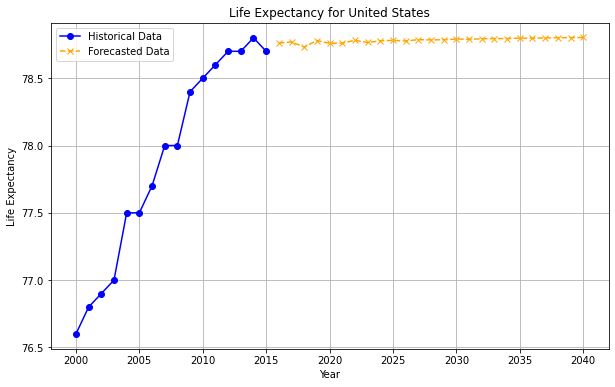

In [15]:
# Compute forecasts for all countries
country_forecasts = forecast_life_expectancy(df)

# Plot the forecast for a specific country
plot_country_forecast(country_forecasts, 'United States')

In [16]:
def prepare_xgboost_data(df, target_column, lag=3):
    """
    Prepare data for supervised learning with lag features.
    """
    data = df.copy()
    features = []
    
    # Create lag features
    for i in range(1, lag + 1):
        data[f"Lag_{i}"] = data.groupby('Country')[target_column].shift(i)
        features.append(f"Lag_{i}")
    
    # Drop rows with NaN due to lagging
    data = data.dropna().reset_index(drop=True)
    return data, features

In [17]:
def train_xgboost(df, target_column, lag=3, test_size=0.2):
    """
    Train an XGBoost model to predict life expectancy.
    """
    # Prepare data with lag features
    data, features = prepare_xgboost_data(df, target_column, lag)
    X = data[features]
    y = data[target_column]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # Train XGBoost model
    model = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"Test RMSE: {rmse:.2f}")
    print(f"Test R^2 Value: {r2:.2f}")
    
    
    return model, features

In [18]:
def forecast_life_expectancy_xgboost(model, df, features, country, start_year=2016, end_year=2040, lag=9):
    """
    Forecast life expectancy for a specific country using the trained XGBoost model.
    """
    forecast_years = range(start_year, end_year + 1)
    country_data = df[df['Country'] == country].sort_values('Year')
    
    # Prepare initial data for forecasting
    last_values = country_data.tail(lag)['Life_expectancy'].values.tolist()
    forecasts = []
    
    for year in forecast_years:
        # Create input data for prediction
        input_data = np.array(last_values[-lag:]).reshape(1, -1)
        pred = model.predict(input_data)[0]
        forecasts.append(pred)
        
        # Update lag values
        last_values.append(pred)
    
    # Return forecasted data
    return pd.DataFrame({'Year': forecast_years, 'Forecasted Life Expectancy': forecasts})

In [19]:
# Train the XGBoost model
xgb_model, lag_features = train_xgboost(df, target_column='Life_expectancy', lag=9)

Test RMSE: 2.53
Test R^2 Value: 0.93


    Year  Forecasted Life Expectancy
0   2016                   75.028320
1   2017                   74.961090
2   2018                   74.850410
3   2019                   75.359138
4   2020                   75.100151
5   2021                   75.393936
6   2022                   75.322166
7   2023                   75.099083
8   2024                   74.880600
9   2025                   75.013931
10  2026                   74.985428
11  2027                   75.100639
12  2028                   75.126709
13  2029                   74.788170
14  2030                   74.746857
15  2031                   74.865173
16  2032                   74.937683
17  2033                   74.975746
18  2034                   74.975555
19  2035                   74.886887
20  2036                   75.084457
21  2037                   75.030617
22  2038                   74.994354
23  2039                   75.008400
24  2040                   74.887123


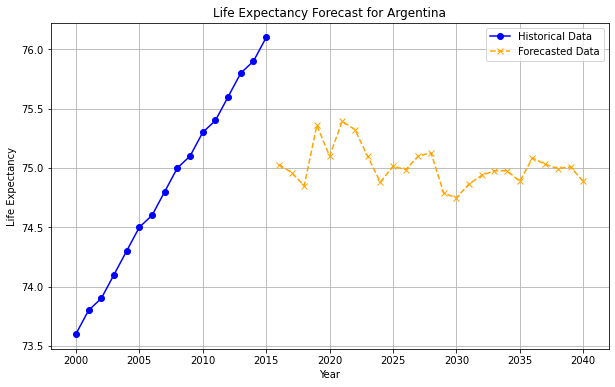

In [20]:
# Forecast life expectancy for a specific country
country_name = 'Argentina'
forecast_df = forecast_life_expectancy_xgboost(
    xgb_model, df, lag_features, country=country_name, start_year=2016, end_year=2040
)

print(forecast_df)

historical_data = df[(df['Country'] == country_name) & (df['Year'] < 2016)].sort_values('Year')
plt.figure(figsize=(10, 6))
plt.plot(historical_data['Year'], historical_data['Life_expectancy'], label="Historical Data", color="blue", marker='o')
plt.plot(forecast_df['Year'], forecast_df['Forecasted Life Expectancy'], label="Forecasted Data", color="orange", linestyle='--', marker='x')
plt.title(f"Life Expectancy Forecast for {country_name}")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend()
plt.grid()
plt.show()

/home/mixmaster01/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


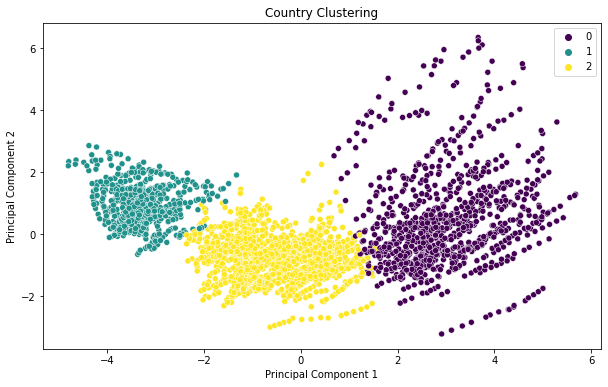

In [21]:
# Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to the dataset
df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Country Clustering")
plt.show()


In [22]:
# Group by country and get the unique clusters for each country
country_clusters = df.groupby('Country')['Cluster'].unique()

# Filter countries with points in multiple clusters
multiple_clusters = country_clusters[country_clusters.apply(len) > 1]

# Display the results
print("Countries with points in multiple clusters:")
print(multiple_clusters)


Countries with points in multiple clusters:
Country
Bahamas, The             [2, 1]
Botswana                 [0, 2]
Cabo Verde               [0, 2]
Cambodia                 [0, 2]
Gabon                    [2, 0]
Ghana                    [0, 2]
Indonesia                [0, 2]
Maldives                 [2, 0]
Montenegro               [2, 1]
Morocco                  [2, 0]
Papua New Guinea         [2, 0]
Philippines              [0, 2]
Russian Federation       [1, 2]
Sao Tome and Principe    [2, 0]
South Africa             [0, 2]
Tajikistan               [2, 0]
Vietnam                  [2, 0]
Name: Cluster, dtype: object
